In [1]:
# Sử dụng thuật toán GD để tìm nghiệm của $f(x) = x^2 - 4x + 4 $
x = 5
eta=0.1
for i in range(100):
    x_new = x - eta*(2*x-4)
    if abs(2*x_new-4) < 1e-3:
        print('Điểm cực tiểu là x1 = %f, giá trị hàm mất mát là cost = %f, sau %d vòng lặp'%(x_new, x_new**2-4*x_new+4, i))
        break
    x=x_new
else:
    print("Không tìm thấy nghiệm chấp nhận được sau {0} vòng lặp".format)

Điểm cực tiểu là x1 = 2.000498, giá trị hàm mất mát là cost = 0.000000, sau 38 vòng lặp


###  Bài tập ở lớp Lý thuyết :
#### VD1 :
$\text{Xét bài toán } ~,~ \displaystyle \min_{x=(x_1,x_2) \in \mathbb{R}^2} f(x_1,x_2) = x_1^2 + 2x_2^2 $    
          

a) Tìm learning rate : t trong GD theo extract line search

b)Cho điểm input $x^0 = (2,1)$. Tìm điểm cập nhật $x^k$ trong GD theo t tìm được ở trên 

In [3]:
import numpy as np
import scipy 
import sympy

In [15]:
from sympy import symbols, diff , Matrix ,solve,latex
import numpy as np
from IPython.display import display, Markdown

# Định nghĩa các biến ký hiệu
x1, x2 = symbols('x1 x2')

# Định nghĩa hàm số
f = x1**2 + 2*x2**2

# Tính đạo hàm của hàm số f đối với x1
df_dx1 = diff(f, x1)

# Tính đạo hàm của hàm số f đối với x2
df_dx2 = diff(f, x2)

# In kết quả
print(f"gradient_fx = ({df_dx1} , {df_dx2})")
hessian_fx = np.matrix([[diff(diff(f, x1), x1), diff(diff(f, x1), x2)],
                         [diff(diff(f, x2), x1), diff(diff(f, x2), x2)]])
print("Hessian matrix: ", *hessian_fx , sep='\n\t\t')

gradient_fx = (2*x1 , 4*x2)
Hessian matrix: 
		[[2 0]]
		[[0 4]]


In [12]:
Matrix([df_dx1, df_dx2])

Matrix([
[2*x1],
[4*x2]])

In [13]:
Matrix(hessian_fx)

Matrix([
[2, 0],
[0, 4]])

In [14]:
s = symbols('s')
tk = Matrix([[x1],[x2]]) - s*Matrix([df_dx1, df_dx2])

In [15]:
f.subs({x1: tk[0], x2:tk[1]})

(-2*s*x1 + x1)**2 + 2*(-4*s*x2 + x2)**2

In [16]:
nghiem_s = solve(diff(f.subs({x1: tk[0], x2:tk[1]}),s))
nghiem_s[0][s]

(x1**2 + 4*x2**2)/(2*(x1**2 + 8*x2**2))

In [66]:
nabla = '\u2207'
display(Markdown(f"Điểm s để f(x-s.{nabla}.f(x)) nhỏ nhất là : ${latex(nghiem_s[0][s])}$"))


Điểm s để f(x-s.∇.f(x)) nhỏ nhất là : $\frac{x_{1}^{2} + 4 x_{2}^{2}}{2 \left(x_{1}^{2} + 8 x_{2}^{2}\right)}$

In [294]:
(f.subs({x1: tk[0], x2:tk[1]})).subs(*nghiem_s)

(-x1*(x1**2 + 4*x2**2)/(x1**2 + 8*x2**2) + x1)**2 + 2*(-2*x2*(x1**2 + 4*x2**2)/(x1**2 + 8*x2**2) + x2)**2

In [18]:
t = nghiem_s[0][s].subs({x1:2,x2:1})
t

1/3

In [19]:
Matrix([df_dx1, df_dx2])

Matrix([
[2*x1],
[4*x2]])

In [72]:
x0 = Matrix([[2],[1]])
x=Matrix([x1,x2])
x = x.subs({x1:2,x2:1})
print(x)
for i in range(100):
    x_new = x - t*(Matrix([df_dx1.subs({x1:x[0]}), df_dx2.subs({x2:x[1]})]))
    dk  = np.array([[float(df_dx1.subs({x1:x[0]}))],[float( df_dx2.subs({x2:x[1]}))]]) #gradient tại x hiện tại
    if abs(np.linalg.norm(dk)) < 1e-5:
        print('Điểm cực tiểu là x1 = %f, x2 = %f, giá trị hàm muc tieu %f, sau %d vòng lặp'%(x_new[0], x_new[1], f.subs({x1: x_new[0], x2:x_new[1]}), i))
        break
    x=x_new

Matrix([[2], [1]])
Điểm cực tiểu là x1 = 0.000000, x2 = 0.000000, giá trị hàm muc tieu 0.000000, sau 13 vòng lặp


Bài thêm : 
1. Hãy giải thích cơ bản về thuật toán Gradient Descent và nó được sử dụng trong lĩnh vực nào trong học máy.


2. Cho hàm số mục tiêu $f(x)=e^x+x^2-\log(1+x^2)$, hãy tính đạo hàm của hàm số này.


3. Sử dụng thuật toán Gradient Descent, hãy tìm giá trị của $x$ để tối ưu hóa hàm số $f(x)=e^x+x^2-\log(1+x^2)$ với giá trị ban đầu $x^{(0)}=3$, sử dụng learning rate là $0.1$ và thực hiện tối đa $100$ vòng lặp. In ra giá trị của $x$ và $f(x)$ tương ứng sau mỗi vòng lặp.


4. Bằng cách thay đổi giá trị $x^{(0)}$ và learning rate trong thuật toán trên, anh/chị hãy đưa ra những trở ngại có thể gặp khi áp dụng Gradient Descent và cách giải quyết chúng.


Thuật toán Gradient Descent là một thuật toán tối ưu hóa được sử dụng để tìm cực trị,giá trị tối ưu của một hàm số. Nó xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0.

Gradient Descent được sử dụng rộng rãi trong lĩnh vực học máy, đặc biệt là trong việc huấn luyện các mô hình dự đoán như hồi quy tuyến tính, mạng neural và các mô hình học sâu khác. Thuật toán này giúp tìm ra các tham số tối ưu của mô hình dựa trên dữ liệu huấn luyện và hàm mất mát, từ đó cải thiện khả năng dự đoán của mô hình.

In [1]:
import sympy 
import numpy as np
from sympy import symbols, diff , Matrix ,solve,latex
from IPython.display import display, Markdown

x = symbols('x')
# f = 3 * sympy.sin(x)**2 * sympy.cos(x)
f = sympy.exp(x) + x**2 - sympy.log(1+x**2)
f

x**2 + exp(x) - log(x**2 + 1)

In [2]:
display(Markdown(f"Đạo hàm của hàm số f(x) = ${latex(f)}$ là : ${latex(diff(f,x))}$"))
diff(f,x)

Đạo hàm của hàm số f(x) = $x^{2} + e^{x} - \log{\left(x^{2} + 1 \right)}$ là : $2 x - \frac{2 x}{x^{2} + 1} + e^{x}$

2*x - 2*x/(x**2 + 1) + exp(x)

In [3]:
def grad(f,a):
    return diff(f,x).subs({x:a}).evalf()  #evalf : chuyển về kiểu số 

def fx(f,a) :
    return f.subs({x:a}).evalf()
    
def gradient_descent(f,x0,it,lr):
    xt = [x0]
    for i in range(it):
        x_new = xt[-1] - lr*grad(f,xt[-1])
        #print(f"Lần lặp thứ {i} : x = {x_new} , f(x) = {fx(f,x_new)}")
        if abs(grad(f,x_new)) < 1e-3:
            break
        xt.append(x_new)
    return (xt, i)

x0 = 3
lr = 0.1
it = 100
(xt,it1) = gradient_descent(f,x0,it,lr)
xt[-1],it1,fx(f,xt[-1])

(-0.717034853860673, 37, 0.587489722627262)

Bằng cách thay đổi giá trị $x^{(0)}$ và learning rate trong thuật toán trên, anh/chị hãy đưa ra những trở ngại có thể gặp khi áp dụng Gradient Descent và cách giải quyết chúng.


In [4]:
x0 = 5
lr = 0.5
it = 100
(xt,it1) = gradient_descent(f,x0,it,lr)
xt[-1],it1,fx(f,xt[-1])

(-0.704441146760136, 4, 0.587668605340227)

In [5]:
def grad(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)
(x1, it1) = myGD1(.1, -3)
(x2, it2) = myGD1(.1, 3)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110938, cost = -3.246394, obtained after 8 iterations
Solution x2 = -1.110294, cost = -3.246394, obtained after 24 iterations


Tuy nhiên hạn chế của phương pháp này đó là cực trị tìm được chỉ là nghiệm gần đúng và không đảm bảo chắc chắn là cực trị toàn cục. Thế nhưng có khi di chuyển ngược chiều đạo hàm mà khiến giá trị $f(x)$ lớn hơn ,đó là khi ta đã vượt dốc, chẳng hạn như khi đã đến rất gần điểm cực trị $(x^*, y^*)$ nhưng _hệ số học tập_ quá lớn làm cho khoảng thay đổi ở bước tiếp theo cũng lớn theo và là nguyên nhân khiến nghiệm cập nhật vượt quá điểm cực trị. Trường hợp này gọi là nhảy dốc (_Step Over_).
Để hạn chế hiện tượng _nhảy dốc_ thì ta cần lựa chọn $lr$ phù hợp bằng sử dụng extract line search hoặc backtracking line search hoặc chọn lr rất nhỏ từ $0.001$ tới $0.005$ và áp dụng những phương pháp tối ưu (_optimizer_) khác nhau để kiểm soát quá trình huấn luyện. Một số phương pháp tối ưu phổ biến là `Adam, Ada, RMProp, ...` 

### Câu khác :
Xét bài toán tối ưu sau
\begin{align}
\min_{x=(x_1,x_2)\in \mathbb{R}^2} f(x)=\dfrac{1}{2}x_1^2+\dfrac{1}{2}x_2^2+2x_2\quad (1)
\end{align}

1. Hãy tìm giá trị tối ưu $p^*$ của bài toán (1).
2. Sử dụng thuật toán Gradient Descent cho bài toán (1) với learning rate được tính theo phương pháp exact line search và điểm khởi tạo $x^{(0)}=(1,0)$, hãy tìm công thức cho điểm cập nhật $x^{(k)}$. 
3. Hãy vẽ đồ thị biểu thị cho sai số $\text{err}_k=|f(x^{(k)})-p^*|$. Từ đó anh/chị rút ra được kết luận gì?

In [8]:
from sympy import symbols, diff, Matrix, solve, latex

# Khai báo các biến
x1, x2 = symbols('x1 x2')

# Ma trận A và vector b
A = Matrix([[1, 0], [0, 3]])
b = Matrix([-1, 2])

# Hàm số f(x) = 1/2 * x^T * A * x - b^T * x
f = 1/2 * Matrix([x1, x2]).T * A * Matrix([x1, x2]) - b.T * Matrix([x1, x2])

# Tính đạo hàm của f theo từng biến
df_x1 = diff(f, x1)
df_x2 = diff(f, x2)

display(Markdown(f"Đạo hàm : ${latex(df_x1)}$"))
display(Markdown(f"Đạo hàm : ${latex(df_x2)}$"))

# Giải hệ phương trình đạo hàm bằng 0
sol = solve([df_x1, df_x2], [x1, x2])
sol

Đạo hàm : $\left[\begin{matrix}1.0 x_{1} + 1\end{matrix}\right]$

Đạo hàm : $\left[\begin{matrix}3.0 x_{2} - 2\end{matrix}\right]$

{x1: -1.00000000000000, x2: 0.666666666666667}

1. Để tìm giá trị tối ưu $p^*$ của bài toán (1), ta cần tìm nghiệm của phương trình đạo hàm bậc nhất của hàm mục tiêu $f(x)$ bằng 0:

$$\begin{align}
\nabla f(x) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2}
\end{bmatrix} = \begin{bmatrix}
x_1 \\
x_2 + 2
\end{bmatrix} = \mathbf{0}
\end{align}$$

Từ đó, ta có $x_1 = 0$ và $x_2 = -2$. Vậy giá trị tối ưu $p^* = f(0, -2) = 2$.



2. Sử dụng thuật toán Gradient Descent với learning rate được tính theo phương pháp exact line search, ta cần tính gradient của hàm mục tiêu tại điểm $x^{(k)}$ và điểm cập nhật $x^{(k+1)}$ được tính như sau:

\begin{align}
x^{(k+1)} = x^{(k)} - s \nabla f(x^{(k)})
\end{align}

Trong đó, $t_k$ là learning rate. Để tính $t_k$ dựa trên exact line search, ta cần giải bài toán tối ưu 1 chiều sau:
$$\begin{align}
t = \arg\min_{s}  f(x^{(k)} - s \nabla f(x^{(k)}))
\end{align}$$



In [9]:
s = symbols('s')
df_dx1 = diff(f,x1)
df_dx2 = diff(f,x2)
tk = Matrix([[x1],[x2]]) - s*Matrix([df_dx1, df_dx2])
tk

Matrix([
[-s*(1.0*x1 + 1) + x1],
[-s*(3.0*x2 - 2) + x2]])

In [10]:
f.subs({x1: tk[0], x2:tk[1]})

Matrix([[-s*(1.0*x1 + 1) + 2*s*(3.0*x2 - 2) + x1 - 2*x2 + 0.5*(-s*(1.0*x1 + 1) + x1)**2 + 1.5*(-s*(3.0*x2 - 2) + x2)**2]])

In [11]:
diff(f.subs({x1: tk[0], x2:tk[1]}),s)#.subs({s:1})

Matrix([[-1.0*x1 + 6.0*x2 + 1.5*(4 - 6.0*x2)*(-s*(3.0*x2 - 2) + x2) + 0.5*(-2.0*x1 - 2)*(-s*(1.0*x1 + 1) + x1) - 5]])

In [12]:
solve(diff(f.subs({x1: tk[0], x2:tk[1]}),s))

[{s: (x1**2 + 2.0*x1 + 9.0*x2**2 - 12.0*x2 + 5.0)/(x1**2 + 2.0*x1 + 27.0*x2**2 - 36.0*x2 + 13.0)}]

In [13]:
nghiem_s = solve(diff(f.subs({x1: tk[0], x2:tk[1]}),s))
nghiem_s[0][s]

(x1**2 + 2.0*x1 + 9.0*x2**2 - 12.0*x2 + 5.0)/(x1**2 + 2.0*x1 + 27.0*x2**2 - 36.0*x2 + 13.0)

In [14]:
nabla = '\u2207'
display(Markdown(f"Điểm s để f(x-s.{nabla}.f(x)) nhỏ nhất là : ${latex(nghiem_s[0][s])}$"))


Điểm s để f(x-s.∇.f(x)) nhỏ nhất là : $\frac{x_{1}^{2} + 2.0 x_{1} + 9.0 x_{2}^{2} - 12.0 x_{2} + 5.0}{x_{1}^{2} + 2.0 x_{1} + 27.0 x_{2}^{2} - 36.0 x_{2} + 13.0}$

In [9]:
6000/37000

0.16216216216216217

In [19]:
nghiem_s[0][s]

(x1**2 + 2.0*x1 + 9.0*x2**2 - 12.0*x2 + 5.0)/(x1**2 + 2.0*x1 + 27.0*x2**2 - 36.0*x2 + 13.0)

In [20]:
t = nghiem_s[0][s].subs({x1:1,x2:0})
t 

0.500000000000000

In [17]:
x0 = Matrix([[1],[0]])
x=Matrix([x1,x2])
x = x.subs({x1:1,x2:0})
print(x)
for i in range(100):
    x_new = x - t*(Matrix([df_dx1.subs({x1:x[0]}), df_dx2.subs({x2:x[1]})]))
    dk  = np.array([[float(df_dx1.subs({x1:x[0]}))],[float( df_dx2.subs({x2:x[1]}))]]) #gradient tại x hiện tại
    if abs(np.linalg.norm(dk)) < 1e-5:
        print('Điểm cực tiểu là x1 = %f, x2 = %f, giá trị hàm muc tieu %f, sau %d vòng lặp'%(x_new[0], x_new[1], f.subs({x1: x_new[0], x2:x_new[1]}), i))
        break
    x=x_new

Matrix([[1], [0]])


TypeError: float() argument must be a string or a number, not 'MutableDenseMatrix'

In [8]:
def xk(f,n,t) :
    if n==0 : 
        return x.subs({x1:1,x2:0})
    return xk(f,n-1,t)+t*Matrix([df_dx1.subs({x1:xk(f,n-1,t)[0]}), df_dx2.subs({x2:xk(f,n-1,t)[1]})])
nk = symbols('nk')
xk(f,1,1)

Matrix([
[4.63564004519695e-6],
[  -2.99998609307986]])

$$\displaystyle \begin{align*}
x^{(k)} &=x^{(k-1)} - t . \nabla f_{x^{(k-1)}}\\
&=x^{(k-1)} - \frac{1}{\delta + 1}(2x_1^{(k-1)},2.\delta.x_2^{(k-1)}) \\
&=(x_1^{(k-1)},x_2^{(k-1)}) - (\frac{2}{\delta+1}x_1^{(k-1)},\frac{2\delta}{\delta+1}x_2^{(k-1)}) \\
&= (\frac{\delta-1}{\delta+1}x_1^{(k-1)},\frac{1-\delta}{\delta+1}x_2^{(k-1)}) \\ 
\end{align*}$$



$$\displaystyle \begin{align*}
x_1^{(k)} = \frac{\delta-1}{\delta+1}x_1^{(k-1)} = \frac{\delta-1}{\delta+1}. \frac{\delta-1}{\delta+1} x_1^{(k-2)} = \dots = (\frac{\delta-1}{\delta+1})^k . x_1^{(0)} = (\frac{\delta-1}{\delta+1})^k . \delta 

\end{align*}$$

$$\displaystyle \begin{align*}
x_2^{(k)} = \frac{1-\delta}{\delta+1}x_2^{(k-1)} = \dots = (\frac{1-\delta}{\delta+1})^k . x_2^{(0)} = (\frac{\delta-1}{\delta+1})^k 
\end{align*}$$

Vậy $$\displaystyle x^{(k)} = \left((\frac{\delta-1}{\delta+1})^k.\delta \quad,\quad (\frac{\delta-1}{\delta+1})^k \right)$$


3. Để vẽ đồ thị biểu thị cho sai số $\text{err}_k = |f(x^{(k)}) - p^*|$, ta sẽ tính giá trị của hàm mục tiêu tại mỗi điểm $x^{(k)}$ và tính sai số tương ứng. Sau đó, vẽ đồ thị của sai số theo số lần lặp.

Sai số được tính bằng:

\begin{align}
\text{err}_k = |f(x^{(k)}) - p^*| = |f(x^{(k)}) - 2|
\end{align}

Vẽ đồ thị sai số $\text{err}_k$ theo số lần lặp $k$. Kết quả sẽ cho thấy cách sai số giảm dần khi thuật toán Gradient Descent tiến gần tới giá trị tối ưu $p^* = 2$.

In [5]:

from sympy import symbols, diff , Matrix ,solve,latex
import numpy as np
from IPython.display import display, Markdown
# Định nghĩa biến ký hiệu vector
x1,x2 = symbols('x1 x2')  # Tạo một vector x gồm 2  thành phần x1, x2 
x = symbols('x')
x = [x1,x2]
# Định nghĩa hàm số dựa trên vector x (ví dụ: f = x1^2 + x2^2 )
f = 1/2*x1**2 + 1/2*x2**2 + 2*x2 

# Tính gradient của hàm số f đối với vector x
gradient_fx = Matrix([diff(f, xi) for xi in x])


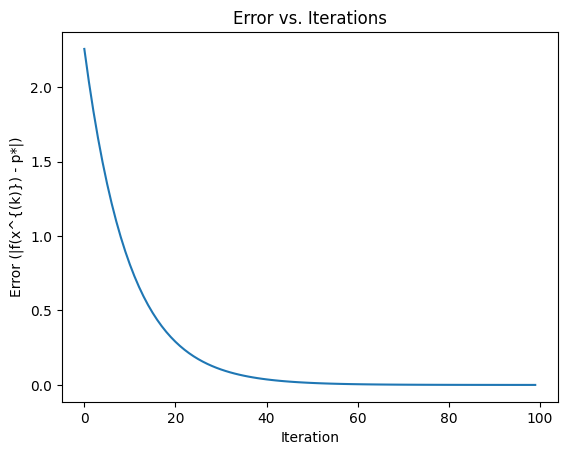

In [11]:
import matplotlib.pyplot as plt

# Define the objective function and optimal value
p_star = -2

# Initialize starting point and other parameters for gradient descent
x1_k, x2_k = 1 , 0  # Initial values
learning_rate = 0.05
num_iterations = 100
err_k_values = []

# Perform gradient descent iterations
for k in range(num_iterations):
    gradient = [diff(f, xi).subs({x1: x1_k, x2: x2_k}) for xi in x]
    x1_k -= learning_rate * gradient[0]
    x2_k -= learning_rate * gradient[1]
    
    # Calculate and store the error at each iteration
    err_k = abs(f.subs({x1: x1_k, x2: x2_k}) - p_star)
    err_k_values.append(err_k)

# Plot the error vs. iterations
plt.plot(range(num_iterations), err_k_values)
plt.xlabel('Iteration')
plt.ylabel('Error (|f(x^{(k)}) - p*|)')
plt.title('Error vs. Iterations')
plt.show()


In [80]:
from scipy.optimize import minimize

# Định nghĩa hàm số của bạn
def objective_function(s):
    x1 = 2  # Thay thế giá trị cụ thể của x1 tại đây
    x2 = 88   # Thay thế giá trị cụ thể của x2 tại đây
    f = -2 * s * (1.0 * x2 + 2) + 2 * x2 + 0.5 * (-1.0 * s * x1 + x1)**2 + 0.5 * (-s * (1.0 * x2 + 2) + x2)**2
    return f

# Tìm giá trị tối thiểu
initial_guess = 0  # Giá trị ban đầu của s
result = minimize(objective_function, initial_guess)

# Kết quả
minimum_s = result.x[0]
minimum_f = result.fun
print(f"Giá trị tối thiểu của s: {minimum_s}")
print(f"Giá trị tối thiểu của hàm số: {minimum_f}")


Giá trị tối thiểu của s: 0.9999999925459968
Giá trị tối thiểu của hàm số: -1.999999999999775
